In [ ]:
!pip install finance-datareader
!pip install ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=5ad33dcea9df542dc05b3bf49ea8d54183087a099b7eb3f779cab05c908cb2a4
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [ ]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
import FinanceDataReader as fdr
from ta.trend import ADXIndicator, adx, adx_pos , adx_neg

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,10)

In [ ]:
order_info = pd.read_excel('/content/drive/MyDrive/ASIAE/2021 금융데이터 경진대회_샘플_한국투자증권 (1).xlsx')

## ADX

In [ ]:
def implement_adx_strategy(prices, pdi, ndi, adx):
  buy_price= []
  sell_price = [] 
  adx_signal = []
  signal = 0

  for i in range(len(prices)):
    if adx[i-1] < 25 and adx[i] > 25 and pdi[i] > ndi[i]:
      if signal != 1:
        buy_price.append(prices[i])
        sell_price.append(np.nan)
        singal =1
        adx_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        adx_signal.append(0)
    elif adx[i-1] <25 and adx[i] >25 and ndi[i] > pdi[i]:
      if signal != -1:
        buy_price.append(np.nan)
        sell_price.append(prices[i])
        signal = -1
        adx_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        adx_signal.append(0)
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)
      adx_signal.append(0)
  
  return buy_price, sell_price, adx_signal

In [ ]:
def ADX_visualization(code, window =14, plot = False):
  buy_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==2)]['주문일자'], format = '%Y%m%d')
  sell_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==1)]['주문일자'], format = '%Y%m%d')
  
  stock = fdr.DataReader(code, '2020-01-05','2020-03-31')
  stock['ADX']= adx(stock['High'],stock['Low'],stock['Close'], window= window)
  stock['PDI'] = adx_pos(stock['High'],stock['Low'],stock['Close'],window= window)
  stock['MDI'] = adx_neg(stock['High'],stock['Low'],stock['Close'],window= window)
  stock = stock.iloc[window+1:,:]
  
  buy_price, sell_price, adx_signal = implement_adx_strategy(stock['Close'], stock['PDI'],stock['MDI'], stock['ADX'])

  if plot == True:
    plt.figure(figsize=(15,7.5))
    ax1 = plt.subplot2grid((11,1),(0,0), rowspan = 5, colspan=1)
    ax2 = plt.subplot2grid((11,1),(6,0), rowspan = 5, colspan=1)
    ax1.plot(stock['Close'], linewidth =2, color = '#ff9800')
    ax1.set_title('CLOSING PRICE')
    ax1.plot(stock.index, buy_price, marker = '^', color = '#26a69a', markersize =14, linewidth = 0 , label = 'BUY SIGNAL')
    ax1.plot(stock.index, sell_price, marker = 'v', color = '#f44336', markersize =14, linewidth = 0 , label = 'SELL SIGNAL')
    ax1.plot(stock.loc[buy_date,'Close'] , marker = '*', color = 'purple',markersize =14, linewidth = 0, label = 'real_buy', alpha = 0.3)
    ax1.plot(stock.loc[sell_date,'Close'] , marker = 'o', color = 'orange',markersize =14, linewidth = 0, label = 'real_sell', alpha = 0.3)
    ax1.legend()

    ax2.plot(stock['PDI'], linewidth =3, color = '#26a69a', label = '+DI '+str(window), alpha =0.3)
    ax2.plot(stock['MDI'], linewidth =3, color = '#f44336', label = '-DI '+str(window), alpha =0.3)
    ax2.plot(stock['ADX'], linewidth =3, color = '#2196f3', label = 'ADX '+str(window))
    ax2.axhline(25, color = 'grey', linewidth=2, linestyle = '--')
    ax2.legend()
    ax2.set_title('ADX '+str(window))
    plt.show()

  return stock

/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


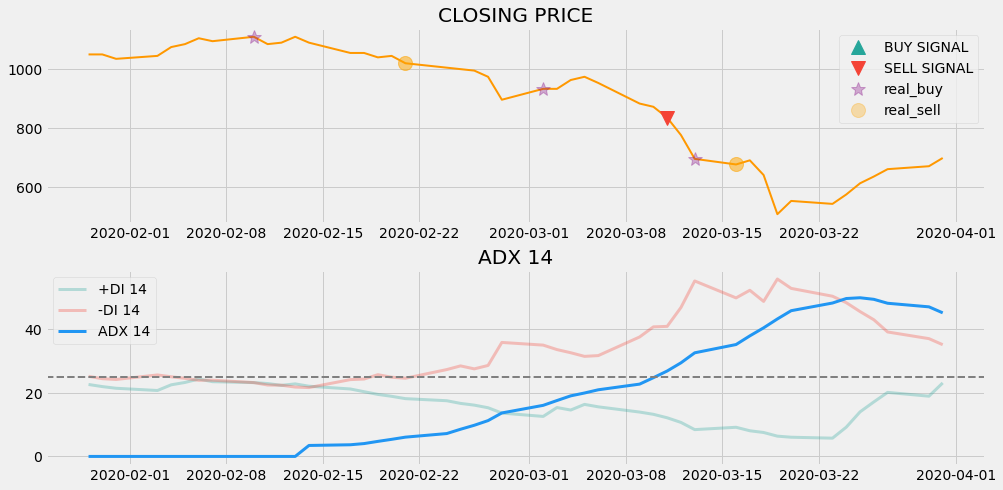

,Open,High,Low,Close,Volume,Change,ADX,PDI,MDI
Date,,,,,,,,,
2020-01-29,1050,1085,1035,1050,6222474,0.000000,0.000000,22.602892,25.161290
2020-01-30,1045,1080,1035,1050,3820993,0.000000,0.000000,21.940564,24.423994
2020-01-31,1045,1065,1030,1035,2905902,-0.014286,0.000000,21.414950,24.181119
2020-02-03,1015,1045,999,1045,3136006,0.009662,0.000000,20.712640,25.598210
2020-02-04,1045,1075,1045,1075,2645217,0.028708,0.000000,22.497787,25.021869
2020-02-05,1080,1090,1065,1085,2171983,0.009302,0.000000,23.240537,24.526298
2020-02-06,1085,1110,1080,1105,2945419,0.018433,0.000000,24.324281,23.914219
2020-02-07,1105,1110,1070,1095,1949721,-0.009050,0.000000,23.482791,23.951781
2020-02-10,1085,1115,1080,1110,2157491,0.013699,0.000000,23.192443,23.195631


In [ ]:
ADX_visualization('002360',14,plot = True)

##  MACD

In [ ]:
from ta.trend import macd, macd_signal

In [ ]:
def implement_macd_strategy(prices,osc):
  buy_price= []
  sell_price = [] 

  for i in range(len(prices)):
    if osc[i-1] < 0 and osc[i] > 0:
        buy_price.append(prices[i])
        sell_price.append(np.nan)
    elif osc[i-1] > 0 and osc[i] < 0:
        buy_price.append(np.nan)
        sell_price.append(prices[i])
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)
     
  
  return buy_price, sell_price

  

In [ ]:
code_number = order_info[(order_info['고객번호'] == 'C00010')]['상품번호'].unique()
code_number = [code.split('A')[1] for code in code_number]

In [ ]:
code_number

['014160',
 '008970',
 '141020',
 '058530',
 '015020',
 '002360',
 '014940',
 '004020',
 '096530']

In [ ]:
def MACD_visualization(code, window =12, plot = False):
  buy_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==2)]['주문일자'], format = '%Y%m%d')
  sell_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==1)]['주문일자'], format = '%Y%m%d')
  
  stock = fdr.DataReader(code, '2019-11-29','2020-03-31')
  stock['MACD']= macd(stock['Close'])
  stock['signal'] = macd_signal(stock['Close'])
  stock['MACD_Oscillator'] = stock['MACD']- stock['signal']
  stock  = stock.loc['2020-01-20':,:]

  buy_price, sell_price = implement_macd_strategy(stock['Close'], stock['MACD_Oscillator'])

  if plot == True:
    plt.figure(figsize=(15,7.5))
    ax1 = plt.subplot2grid((11,1),(0,0), rowspan = 5, colspan=1)
    ax2 = plt.subplot2grid((11,1),(6,0), rowspan = 5, colspan=1)
    ax1.plot(stock['Close'], linewidth =2, color = '#ff9800')
    ax1.set_title('CLOSING PRICE')
    ax1.plot(stock.index, buy_price, marker = '^', color = '#26a69a', markersize =14, linewidth = 0 , label = 'BUY SIGNAL')
    ax1.plot(stock.index, sell_price, marker = 'v', color = '#f44336', markersize =14, linewidth = 0 , label = 'SELL SIGNAL')
    ax1.plot(stock.loc[buy_date,'Close'] , marker = '*', color = 'purple',markersize =14, linewidth = 0, label = 'real_buy', alpha = 0.3)
    ax1.plot(stock.loc[sell_date,'Close'] , marker = 'o', color = 'orange',markersize =14, linewidth = 0, label = 'real_sell', alpha = 0.3)
    ax1.legend()

    ax2.plot(stock['MACD'], linewidth =3, color = '#26a69a', label = 'MACD '+str(window), alpha =0.3)
    ax2.plot(stock['signal'], linewidth =3, color = '#f44336', label = 'signal '+str(window), alpha =0.3)
    ax2.bar(stock.index, stock['MACD_Oscillator'], linewidth =3, color = '#2196f3', label = 'MACD_Oscillator '+str(window))
    ax2.axhline(0, color = 'grey', linewidth=2, linestyle = '--')
    ax2.legend()
    ax2.set_title('MACD '+str(window))
    plt.show()

  return stock, buy_price, sell_price

In [ ]:
# stock.index.astype('str')

In [ ]:
stock = fdr.DataReader('228790', '2019-11-29','2020-03-31')
stock['MACD']= macd(stock['Close'])
stock['signal'] = macd_signal(stock['Close'])
stock['MACD_Oscillator'] = stock['MACD']- stock['signal']
stock  = stock.loc['2020-01-20':,:]
plt.bar(stock.index.astype('str'), stock['MACD_Oscillator'], linewidth =3, color = '#2196f3', label = 'MACD_Oscillator ')

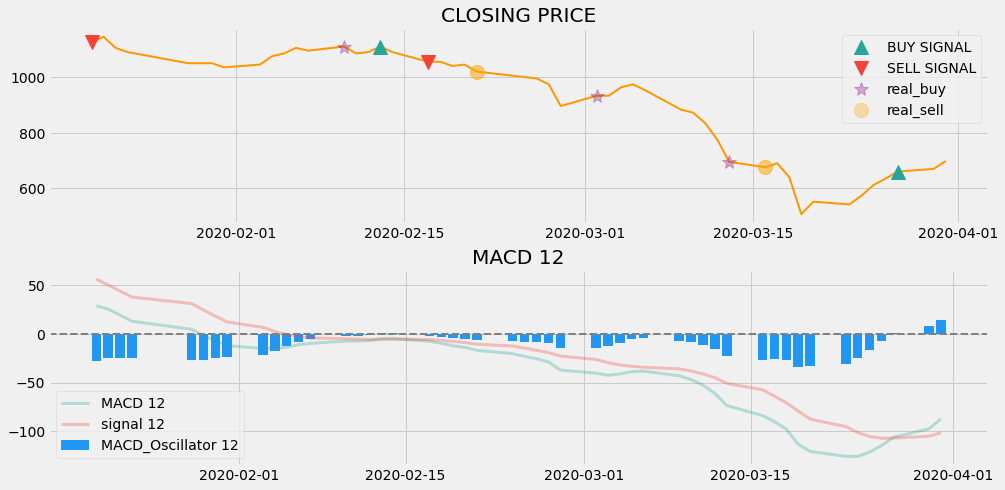

In [ ]:
stock0022360,  buy_price, sell_price = MACD_visualization('002360',plot= True)

In [ ]:
buy_sell = pd.DataFrame({'매수가격':buy_price, '매도가격':sell_price})
print(buy_sell.set_index(stock0022360.index)['매수가격'].dropna(),
buy_sell.set_index(stock0022360.index)['매도가격'].dropna())


Date
2020-02-13    1110.0
2020-03-27     660.0
Name: 매수가격, dtype: float64 Date
2020-01-20    1125.0
2020-02-17    1055.0
Name: 매도가격, dtype: float64


## Stochastic Oscillator

In [ ]:
from ta.momentum import stoch, stoch_signal

In [ ]:
def implement_stochastic_strategy(prices,k,d):
  buy_price= []
  sell_price = [] 

  for i in range(len(prices)):
    if (k[i-1] > 20 and k[i] < 20) &(k[i-1]<d[i-1] and k[i]>d[i]):
        buy_price.append(prices[i])
        sell_price.append(np.nan)
    elif (k[i-1] < 80 and k[i]>80) &(k[i-1]>d[i-1] and k[i]<d[i]):
        buy_price.append(np.nan)
        sell_price.append(prices[i])
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)
     
  
  return buy_price, sell_price

In [ ]:







def stoch_visualization(code, window =14, plot = False):
  buy_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==2)]['주문일자'], format = '%Y%m%d')
  sell_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==1)]['주문일자'], format = '%Y%m%d')
  
  stock = fdr.DataReader(code, '2019-12-30','2020-03-31')
  stock['%k']= stoch(stock['High'], stock['Low'], stock['Close'])
  stock['%d']= stoch_signal(stock['High'], stock['Low'], stock['Close'])
  stock = stock.dropna()

  buy_price, sell_price = implement_stochastic_strategy(stock['Close'], stock['%k'],stock['%d'])

  if plot == True:
    plt.figure(figsize=(15,7.5))
    ax1 = plt.subplot2grid((11,1),(0,0), rowspan = 5, colspan=1)
    ax2 = plt.subplot2grid((11,1),(6,0), rowspan = 5, colspan=1)
    ax1.plot(stock['Close'], linewidth =2, color = '#ff9800')
    ax1.set_title('CLOSING PRICE')
    ax1.plot(stock.index, buy_price, marker = '^', color = '#26a69a', markersize =14, linewidth = 0 , label = 'BUY SIGNAL')
    ax1.plot(stock.index, sell_price, marker = 'v', color = '#f44336', markersize =14, linewidth = 0 , label = 'SELL SIGNAL')
    ax1.plot(stock.loc[buy_date,'Close'] , marker = '*', color = 'purple',markersize =14, linewidth = 0, label = 'real_buy', alpha = 0.3)
    ax1.plot(stock.loc[sell_date,'Close'] , marker = 'o', color = 'orange',markersize =14, linewidth = 0, label = 'real_sell', alpha = 0.3)
    ax1.legend()

   
    ax2.plot(stock['%k'], linewidth =3, color = '#26a69a', label = '%k '+str(window))
    ax2.plot(stock['%d'], linewidth =3, color = '#f44336', label = '%d '+str(window))
    # ax2.bar(stock.index, stock['stoch_osc'], linewidth =3, color = '#2196f3', label = 'Stochastic_Oscillator '+str(window))
    ax2.axhline(20, color = 'grey', linewidth=2, linestyle = '--')
    ax2.axhline(80, color = 'grey', linewidth=2, linestyle = '--')
    ax2.legend()
    ax2.set_title('Stochastic '+str(window))
    plt.show()

  return stock

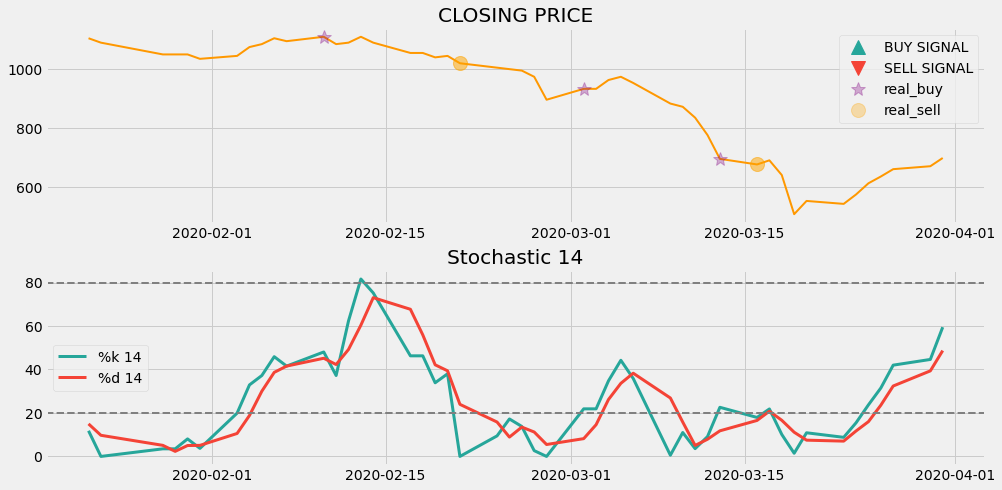

,Open,High,Low,Close,Volume,Change,%k,%d
Date,,,,,,,,
2020-01-22,1140,1145,1100,1105,11985195,-0.034934,11.805556,14.973364
2020-01-23,1105,1135,1090,1090,10709583,-0.013575,0.000000,9.722222
2020-01-28,1070,1075,1025,1050,7589676,-0.036697,3.496503,5.100686
2020-01-29,1050,1085,1035,1050,6222474,0.000000,3.496503,2.331002
2020-01-30,1045,1080,1035,1050,3820993,0.000000,8.064516,5.019174
2020-01-31,1045,1065,1030,1035,2905902,-0.014286,3.703704,5.088241
2020-02-03,1015,1045,999,1045,3136006,0.009662,19.913420,10.560547
2020-02-04,1045,1075,1045,1075,2645217,0.028708,32.900433,18.839186
2020-02-05,1080,1090,1065,1085,2171983,0.009302,37.229437,30.014430


In [ ]:
stoch_visualization(code_number[5], plot= True)

In [ ]:
stock228790

,Open,High,Low,Close,Volume,Change,stoch_osc
Date,,,,,,,
2020-01-20,3588,3608,3465,3485,466989,-0.022440,74.901961
2020-01-21,3529,3529,3385,3410,231285,-0.021521,60.196078
2020-01-22,3340,3480,3132,3475,209113,0.019062,72.941176
2020-01-23,3465,3465,3385,3402,186233,-0.021007,58.627451
2020-01-28,3112,3212,3112,3133,403587,-0.079071,5.882353
2020-01-29,3132,3182,3103,3148,383585,0.004788,8.823529
2020-01-30,3177,3177,3023,3044,219178,-0.033037,3.559322
2020-01-31,2993,3073,2968,2980,152236,-0.021025,1.860465
2020-02-03,2875,3008,2870,2990,482401,0.003356,16.150740
